In [10]:
## Import Packages
from __future__ import print_function

import numpy as np

#Plotting Packages
import matplotlib as mpl
import matplotlib.cm as cmplt
import matplotlib.pyplot as plt
from matplotlib import rcParams

#I/O
import glob
import copy
import time
import os
import scipy.io as sio

#Plotting Style
%matplotlib inline
plt.style.use('dark_background')
rcParams['text.usetex'] = False
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['legend.fontsize'] = 12
rcParams['axes.labelsize'] = 20
rcParams['font.family'] = 'sans-serif'

In [11]:
import aotools
from aotools.turbulence import infinitephasescreen
import imageio
from pytransit import QuadraticModel

In [12]:
tm = QuadraticModel()
times = np.linspace(-0.3,0.3,101)
tm.set_data(times)

In [13]:
transit_curve = tm.evaluate(k=0.1, ldc=[0.2, 0.1], t0=0.0, p=1.0, a=1.3, i=0.5*np.pi)

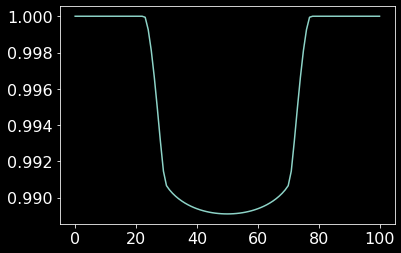

In [14]:
plt.plot(transit_curve)

In [24]:
def star_flux(flux,sigma_x = 6.,sigma_y = 12.,size = 256):
    x = np.linspace(-size/2, size/2-1, size)
    y = np.linspace(-size/2, size/2-1, size)
    x, y = np.meshgrid(x, y)
    
    z = flux*(1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2)
         + y**2/(2*sigma_y**2))))
    return z

def convolver(turb,im2):
    if1 = turb
    if2 = np.fft.fftshift(np.fft.fft2(im2))
    conv = np.multiply(if1,if2)
    iif = np.fft.ifft2(conv)
    return iif

def noise(img,gauss_sig=5): #change to something smaller like 1?
    #convert from 0-1 norm to unit16
    in_img = 25000*img #25000*img #maybe we dont need to multiply by 25000
    out_img = np.random.poisson(in_img)
    out_img += np.random.normal(0, gauss_sig, (img.shape[0],img.shape[0])).astype(np.int64)
    return np.abs(out_img)

In [16]:
#type(z[0,0]),32767*z.min(),25000*z.max()

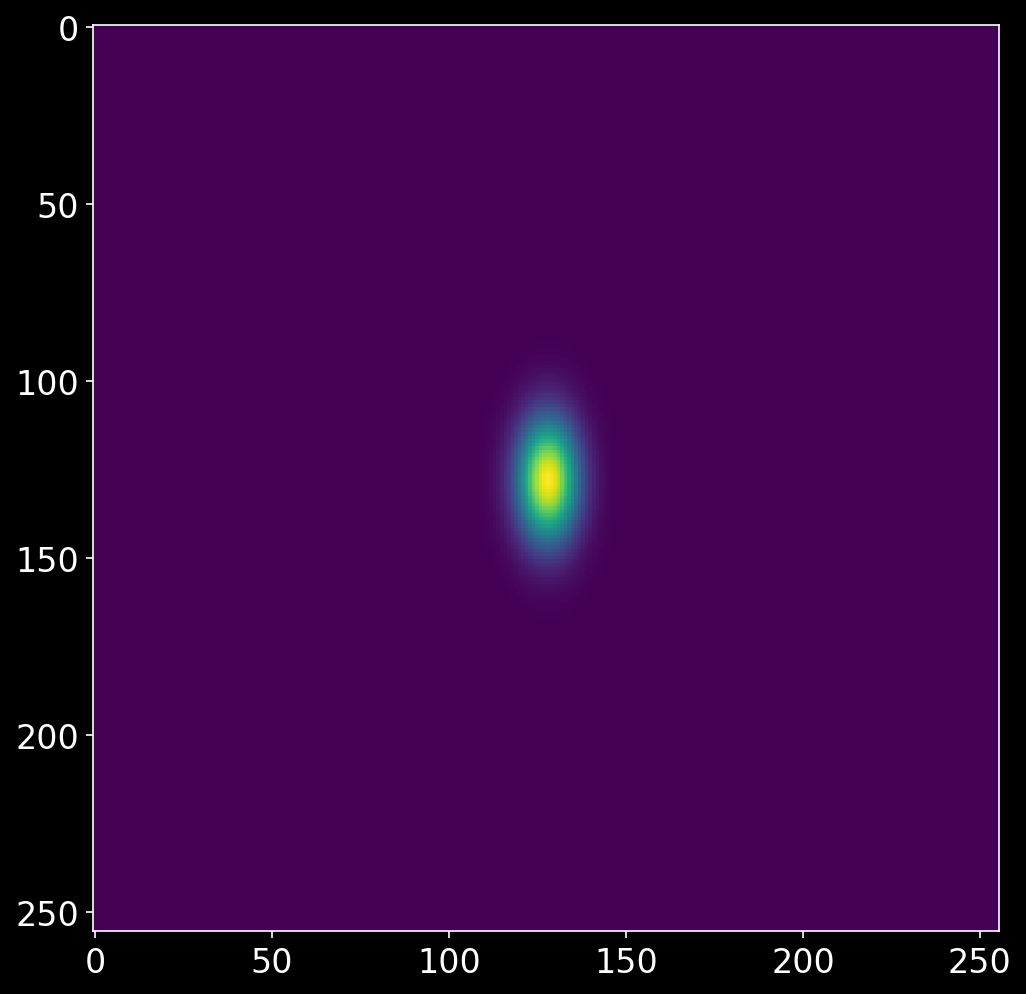

In [88]:
#fig = plt.figure(figsize=(8,8),dpi=150)
#z = star_flux(i)
#plt.imshow(z)

In [17]:
from tqdm import tqdm

In [18]:
imagepath = '../obd_matlab/data/epsilon_lyrae/'

def y_fname(i):
    return imagepath+"{0:08d}".format(i)+'.png'

test = imageio.imread(y_fname(10))

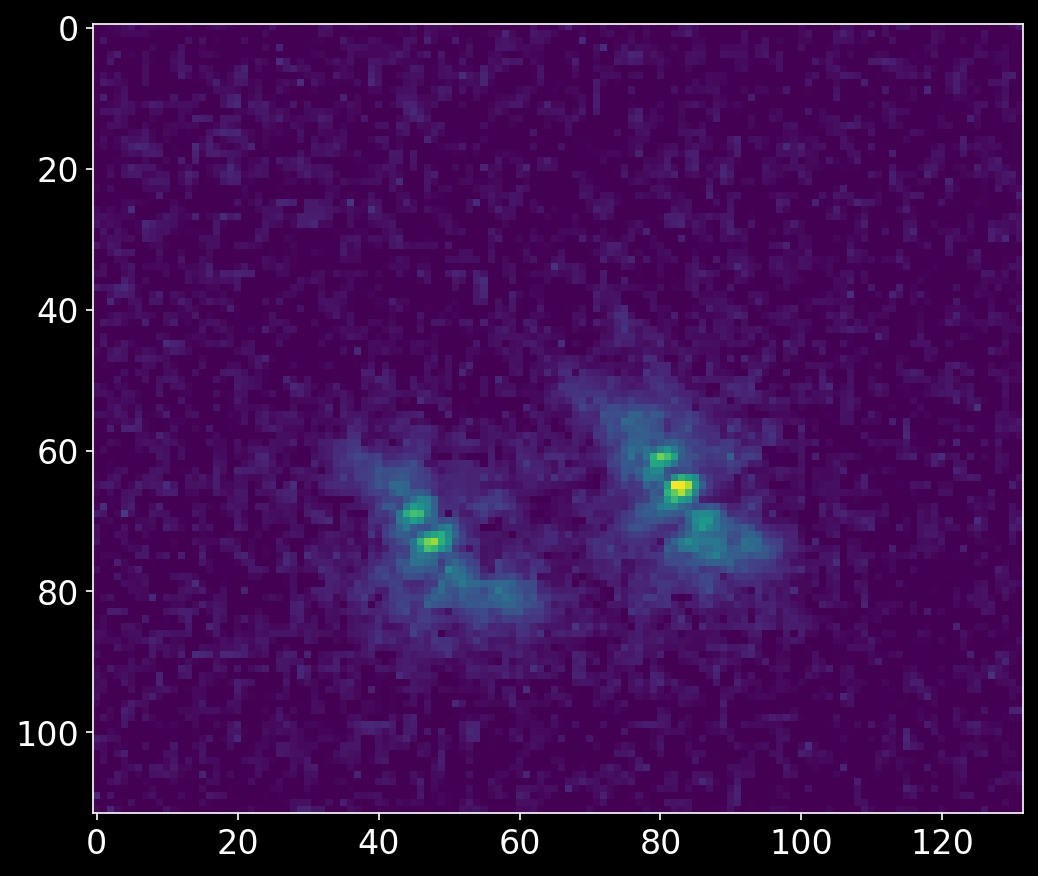

In [19]:
fig = plt.figure(figsize=(8,8),dpi=150)
plt.imshow(test[:,:,0])

In [20]:
test[:,:,0].min(),test[:,:,0].max()

(0, 199)

In [ ]:
ideal_curve = []
for indx, i in enumerate(tqdm(transit_curve)):
    z = star_flux(i)
    ideal_curve.append(i)
    out_z = 25000*z
    imageio.imwrite('data1/transit_test_gt_{}.png'.format(indx), out_z.astype(np.uint8))
    for j in range(40):
        scrn = infinitephasescreen.PhaseScreenKolmogorov(256, 0.4/256, 0.025, 0.1, random_seed=107*indx)
        final_img = noise(z)
        #final_img = noise(np.abs(convolver(scrn.scrn,z)))
        imageio.imwrite('data1/transit_test_{}_slice_{}.png'.format(indx,j), final_img.astype(np.uint8))

In [ ]:
fig = plt.figure(figsize=(8,8),dpi=150)
plt.plot(ideal_curve/np.max(ideal_curve))

In [25]:
ideal_curve = []
for indx, i in enumerate(tqdm(transit_curve)):
    z = star_flux(i)
    ideal_curve.append(i)
    out_z = 25000*z
    imageio.imwrite('data1/transit_test_gt_{}.tiff'.format(indx), out_z)
    for j in range(40):
        scrn = infinitephasescreen.PhaseScreenKolmogorov(256, 0.4/256, 0.025, 0.1, random_seed=107*indx)
        final_img = noise(z)
        #final_img = noise(np.abs(convolver(scrn.scrn,z)))
        imageio.imwrite('data1/transit_test_{}_slice_{}.tiff'.format(indx,j), final_img)

100%|█████████████████████████████████████████████████████████████████████████████| 101/101 [5:25:08<00:00, 193.15s/it]


In [102]:
for i in range(0,1):
    print(i)

0
